# Convolutional Neural Network Architecture

A great way to use deep learning to classify images is to build a convolutional neural network (CNN). The Keras library in Python makes it pretty simple to build a CNN.

Keras is a higher level library which operates over either TensorFlow, and is intended to stream-line the process of building deep learning networks.

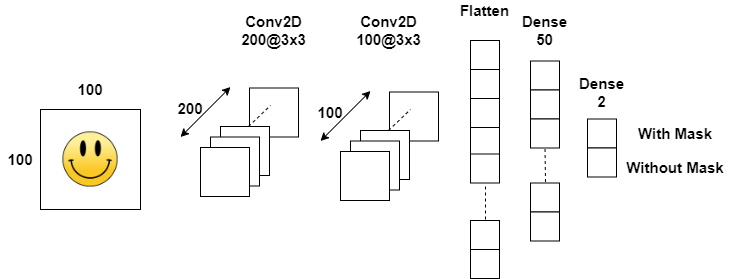

In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')


### Building Convolutional Neural Network
1. Our first 2 layers are **Conv2D** layers. These are convolution layers that will deal with our input images, which are seen as 2-dimensional matrices.
100 in the first layer and 200 in the second layer are the number of nodes in each layer.


    1.Kernel size is the size of the filter matrix for our convolution. We will have a 3x3 filter matrix. 

    2. Our first layer also takes in an input shape.


4. **Activation** is the activation function for the layer. The activation function we will be using for our first 2 layers is the ReLU, or Rectified Linear Activation. 


5. We add a **2D max pooling layer**. Specify the size of the pooling in the x and y directions – (2, 2) and stride of (1,1)


6. In between the Conv2D layers and the dense layer, there is a **Flatten** layer. Flatten serves as a connection between the convolution and dense layers.


7. **Dense** is the layer type we will use in for our output layer. Dense is a standard layer type.


    We will have 2 nodes in our output layer, one for each possible outcome (0–1).


9. The activation is **softmax**. Softmax makes the output sum up to 1 so the output can be interpreted as probabilities. The model will then make its prediction based on which option has the highest probability.


In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

##### Compiling the model takes three parameters: optimizer, loss and metrics.

1. **categorical_crossentropy** for our loss function. This is the most common choice for classification. A lower score indicates that the model is performing better.


2. The **optimizer** controls the learning rate. We will be using ‘adam’ as our optmizer. The adam optimizer adjusts the learning rate throughout training. The learning rate determines how fast the optimal weights for the model are calculated.

    -- A smaller learning rate may lead to more accurate weights (up to a certain point), but the time it takes to compute the weights will be longer.

    
3. **accuracy** metric to see the accuracy score on the validation set when we train the model.

In [4]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [5]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
86/86 [==============================] - ETA: 0s - loss: 0.6320 - accuracy: 0.6381WARNING:tensorflow:From C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model-001.model\assets
86/86 [==============================] - 152s 2s/step - loss: 0.6320 - accuracy: 0.6381 - val_loss: 0.5285 - val_accuracy: 0.7398
Epoch 2/20
86/86 [==============================] - 178s 2s/step - loss: 0.4797 - accuracy: 0.7602 - val_loss: 0.4728 - val_accuracy: 0.7965
Epoch 3/20
86/86 [==============================] - 165s 2s/step - loss: 0.3719 - accuracy: 0.8227 - val_

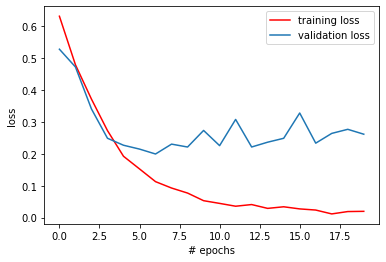

In [6]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

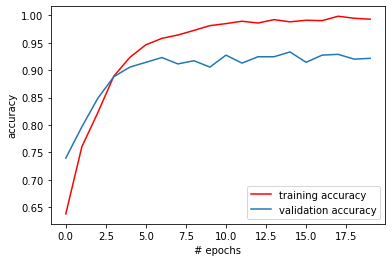

In [7]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [8]:
print(model.evaluate(test_data,test_target))

12/12 [==============================] - 5s 413ms/step - loss: 0.3106 - accuracy: 0.9295
[0.3105945587158203, 0.9295039176940918]


# Detecting Faces with and without masks

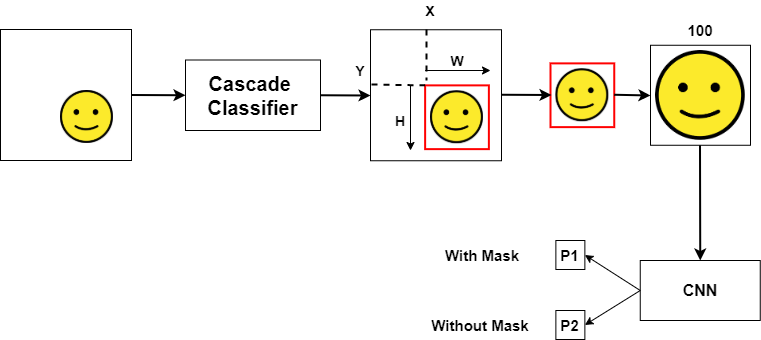


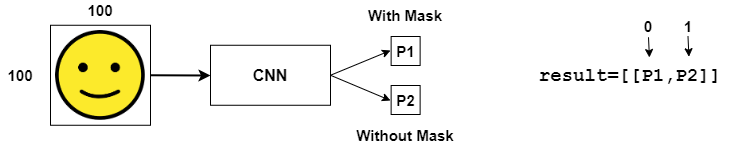

In [2]:
from keras.models import load_model
import cv2
import numpy as np

In [3]:
model = load_model('model-001.model')

face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 
#using the Haar Feature-based Cascade Classifiers for detecting the features of the face. 
#This cascade classifier is designed by OpenCV to detect the frontal face by training thousands of images

source=cv2.VideoCapture(2) ##OpenCV library to run an infinite loop to use our web camera in which we detect the face using the Cascade Classifier

labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)} # green n red 

In [3]:
while(True):
    cap = cv2.VideoCapture(0)
    ret,img=cap.read()
    
    ##img=cv2.flip(img,1,1) #Flip to act as a mirror
     
    ##mini = cv2.resize(img, (img.shape[1] // size, img.shape[0] // size)) # Resize the image to speed up detection
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #one color-space to another, BGR -> Gray
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  
    
    # Draw rectangles around each face
    for (x,y,w,h) in faces:
    
        face_img=gray[y:y+w,x:x+w] #Scale the shapesize backup
        #Save just the rectangle faces in SubRecFaces
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)  #prediction
        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
    # Show the image  
    cv2.imshow('DetectFACE',img)
    key=cv2.waitKey(1)
    
    if(key==27): #press Esc key to exit
        break
        
cv2.destroyAllWindows()
source.release()

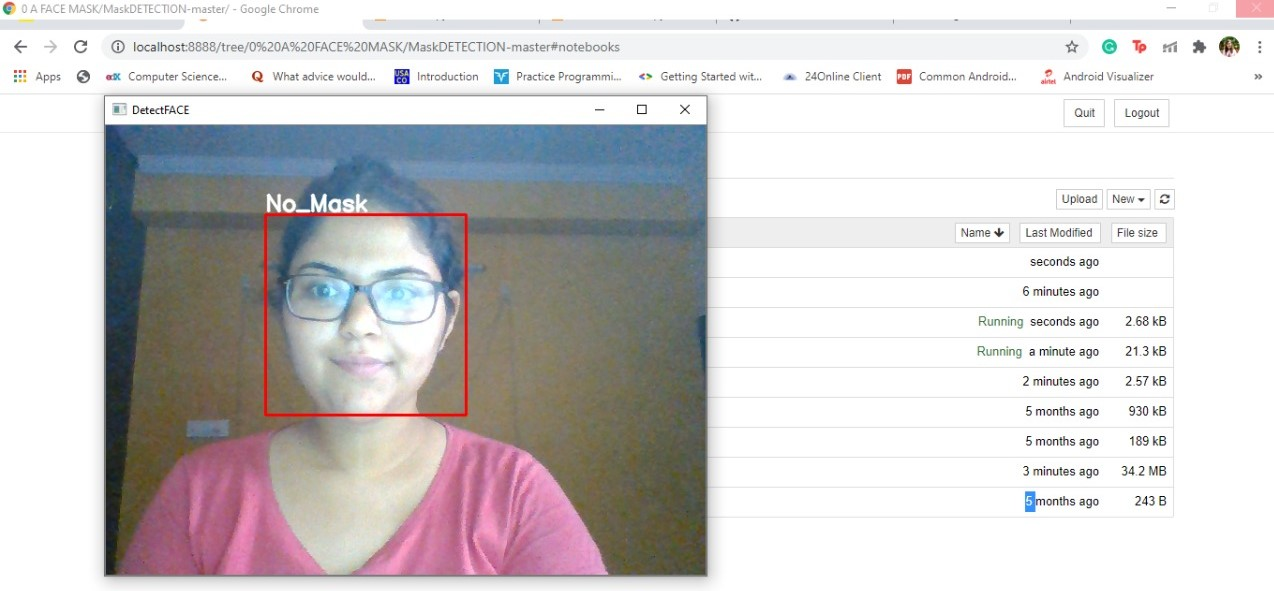

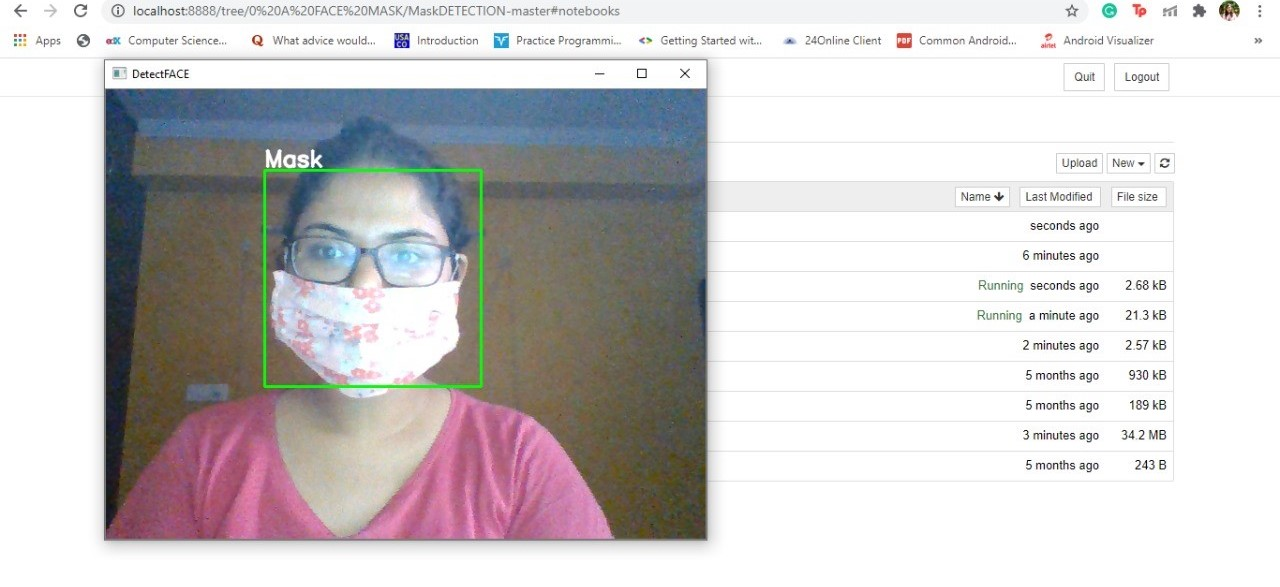

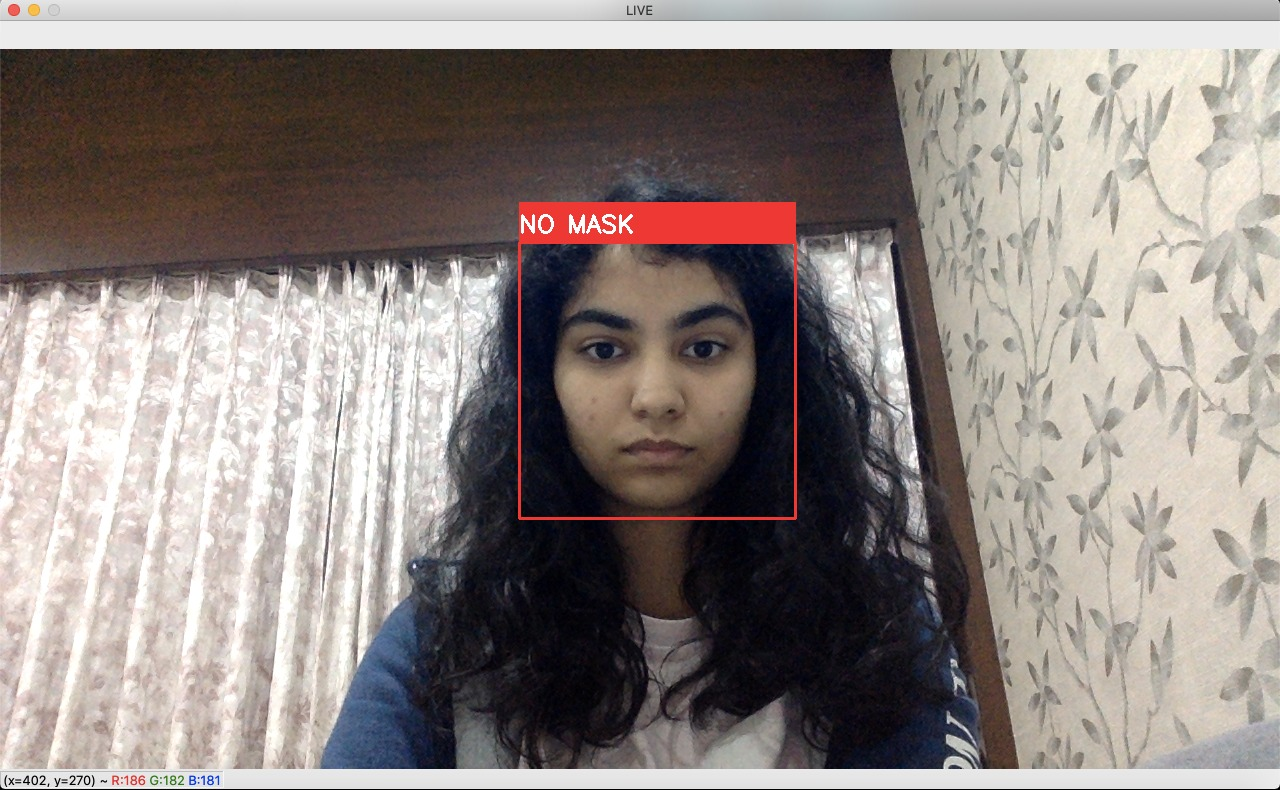

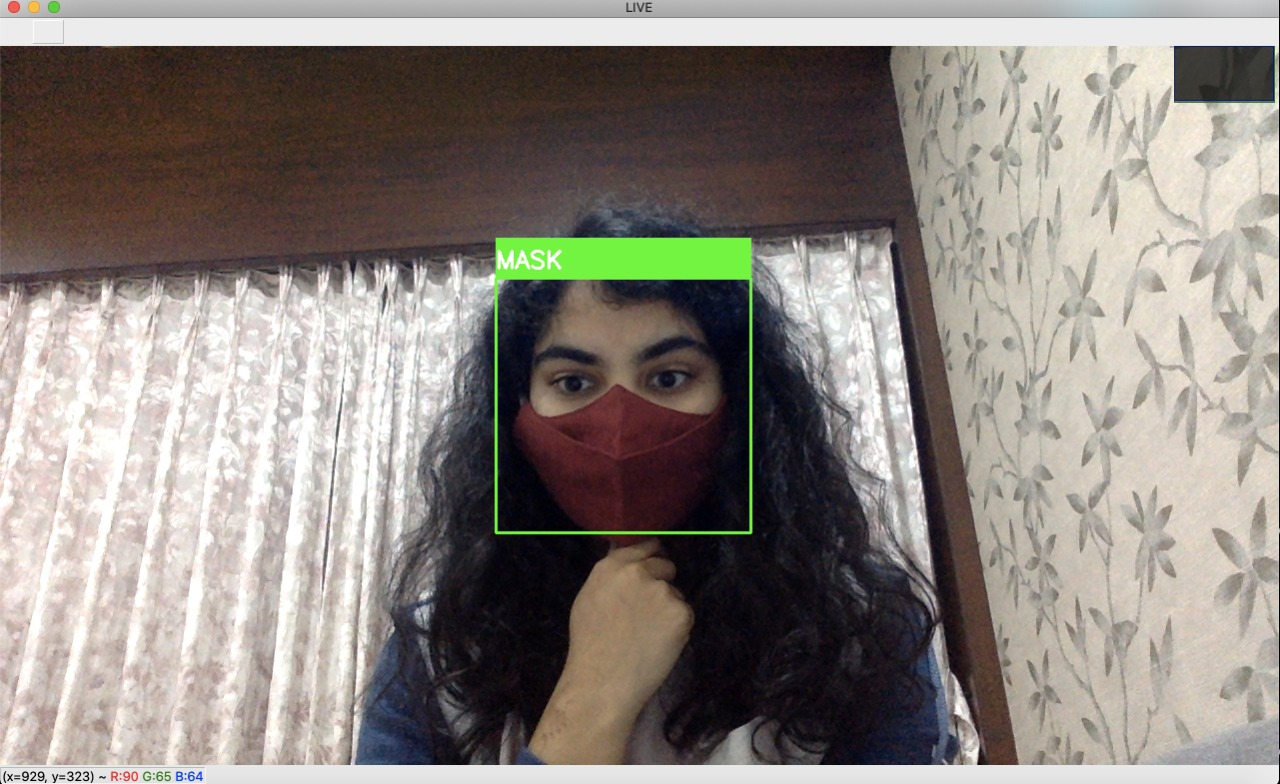